In [1]:
azure_storage_account_name = 'med'
azure_storage_account_key = 'gAhZS9iD56r3fRN+/lokQSE4CAysWtuqc5H2xSeCb9GLJdmS4FEBrUIqYHuj/RdiqOK+haJva2u7A6OkrLUzOg==' 

if azure_storage_account_name is None:
    raise Exception("You must provide a name for an Azure Storage account")
    
api_key = 'd10d6e5ff2aa413e8f39ba1aa2ae241e'


In [3]:
#!pip install azure-storage==0.32.0

In [4]:
from azure.storage.blob import BlockBlobService

# create blob service object to access the files in the storage
# You can access your account_name and account_key values at [Azure Management Portal](https://portal.azure.com)
blob_service = BlockBlobService(azure_storage_account_name, azure_storage_account_key)

In [5]:
# select container (folder) name where the files resides
container_name = 'blood'

# list files in the selected folder
generator = blob_service.list_blobs(container_name)

blob_prefix = 'https://{0}.blob.core.windows.net/{1}/{2}'

img_list = []

print("List of files in the container:")
for blob in generator:
    url = (blob_prefix.format(blob_service.account_name, container_name, blob.name))
    print (url)
    img_list.append(blob.name)
    
len(img_list)

List of files in the container:
https://med.blob.core.windows.net/blood/482875.329025.jpeg
https://med.blob.core.windows.net/blood/6000149b081626d3f05857b46c5f2d61.jpg
https://med.blob.core.windows.net/blood/6512bd43d9caa6e02c990b0a82652dca_24149f62898e0507bedb6f8a304ab2ef_13553907231_800px.jpeg
https://med.blob.core.windows.net/blood/75028323.246101641.jpeg
https://med.blob.core.windows.net/blood/75028323.246101680.jpeg
https://med.blob.core.windows.net/blood/ANALIZ-KROVI.png
https://med.blob.core.windows.net/blood/a97fd04475b3.jpg
https://med.blob.core.windows.net/blood/aabb1cafef9ca2563096677094059d1ac1211a148621951.jpg
https://med.blob.core.windows.net/blood/analiz-blank.jpg
https://med.blob.core.windows.net/blood/c61174d28545c047f11d787e6443e63c.jpg
https://med.blob.core.windows.net/blood/hlamid24.jpg
https://med.blob.core.windows.net/blood/image.jpg
https://med.blob.core.windows.net/blood/norma-obshhij-krovi-u-zhenshhin.png
https://med.blob.core.windows.net/blood/p-0533bf53dde3cb

20

In [6]:
# blob_name = 'emotion1.jpeg'
# blob = blob_service.get_blob_to_bytes(container_name, blob_name)
# blob

# OCR

In [7]:
from IPython.display import Image as ipImage, display

# Show the original image that we will process
# img_url = 'https://med.blob.core.windows.net/test/ocr2.jpeg'
# img_url = '/home/rustam/Pictures/med/blood/a97fd04475b3.jpg'
img_url = blob_prefix.format(blob_service.account_name, container_name, img_list[6])

# img_url = 'blob:https://web.telegram.org/91e3f998-9236-4056-b92d-9edc8c636efe'

img = ipImage(url=img_url, width=250, height=250)
display(img)

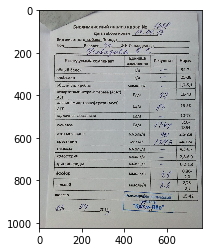

In [18]:
%matplotlib inline

from PIL import Image
import matplotlib.pyplot as plt
import io
import urllib

import cStringIO

image_file_in_mem = cStringIO.StringIO(urllib.urlopen(img_url).read())
img_bytes = Image.open(image_file_in_mem)

# python3
# image_file_in_mem = io.BytesIO(blob)
# img_bytes = Image.open(image_file_in_mem)
plt.imshow(img_bytes)

In [22]:
import httplib, urllib, base64

headers = {
    # Request headers
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': api_key,
}

params = urllib.urlencode({
    # Request parameters
    'language': 'unk',
    'detectOrientation ': 'true',
})

body = '{\'url\':\'' + img_url + '\'}'


try:
    conn = httplib.HTTPSConnection('eastus.api.cognitive.microsoft.com')
    conn.request("POST", "/vision/v1.0/ocr?%s" % params, body, headers)
    response = conn.getresponse()
    data = response.read()
#     print(data)
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))
    
import json
res_json = json.loads(data.decode('utf-8'))

print(json.dumps(res_json, indent=2, sort_keys=True,  ensure_ascii=False))


{
  "language": "ru", 
  "orientation": "Up", 
  "regions": [
    {
      "boundingBox": "85,69,421,81", 
      "lines": [
        {
          "boundingBox": "161,69,345,22", 
          "words": [
            {
              "boundingBox": "161,69,166,18", 
              "text": "Биохимический"
            }, 
            {
              "boundingBox": "334,74,74,13", 
              "text": "анализ"
            }, 
            {
              "boundingBox": "414,74,62,17", 
              "text": "крови"
            }, 
            {
              "boundingBox": "483,71,23,16", 
              "text": "N2"
            }
          ]
        }, 
        {
          "boundingBox": "257,101,169,19", 
          "words": [
            {
              "boundingBox": "257,103,42,17", 
              "text": "Дата"
            }, 
            {
              "boundingBox": "304,101,62,19", 
              "text": "забора"
            }, 
            {
              "boundingBox": "373,106,53,14", 


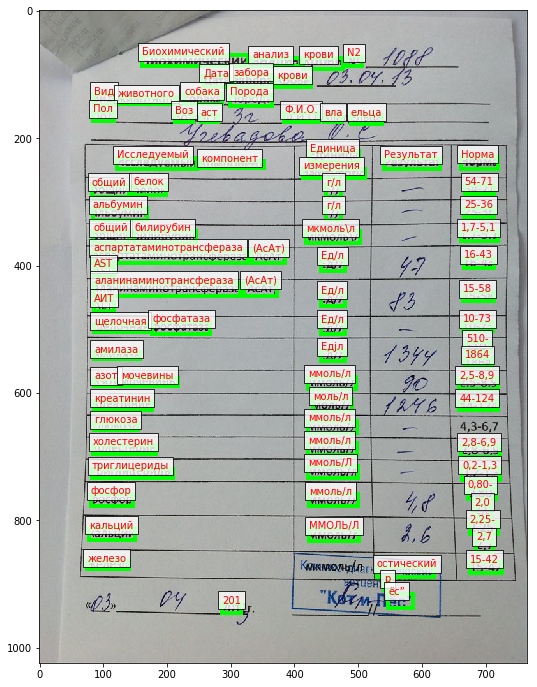

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.figure(figsize=(12, 12))
ax = plt.gca()

text_angle = 0
try:
    text_angle = res_json['textAngle']
except:
    pass

# Draw OCR rectangles
for i in res_json['regions']:
    pl = i['lines']
    for k in pl:
        words = k['words']
        for l in words:
            bb = l['boundingBox']
            txt = l['text']
            
            bb = list(map(int, bb.split(',')))
            
            ax.add_patch(
                patches.Rectangle(
                    (bb[0], bb[1]), bb[2], bb[3], angle=text_angle,
                    fill=False, linewidth=4, color='#00FF00')
            )
            
            ax.text(bb[0], bb[1], txt, 
                    fontsize=10, weight='normal', color='red', bbox=dict(facecolor='white', alpha=0.8))
            
plt.imshow(img_bytes)